<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
sns.set()

In [ ]:
files.upload()
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

Saving diamonds.csv to diamonds.csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamonds.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
diamonds.median()

<ipython-input-5-9ef29424fc62>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds.median()


Unnamed: 0    26970.50
carat             0.70
depth            61.80
table            57.00
price          2401.00
x                 5.70
y                 5.71
z                 3.53
dtype: float64

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamonds.drop(columns=['Unnamed: 0'], inplace=True)
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
dup_dim = diamonds[diamonds.duplicated()]
dup_dim

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
diamonds = diamonds.drop_duplicates()

In [ ]:
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


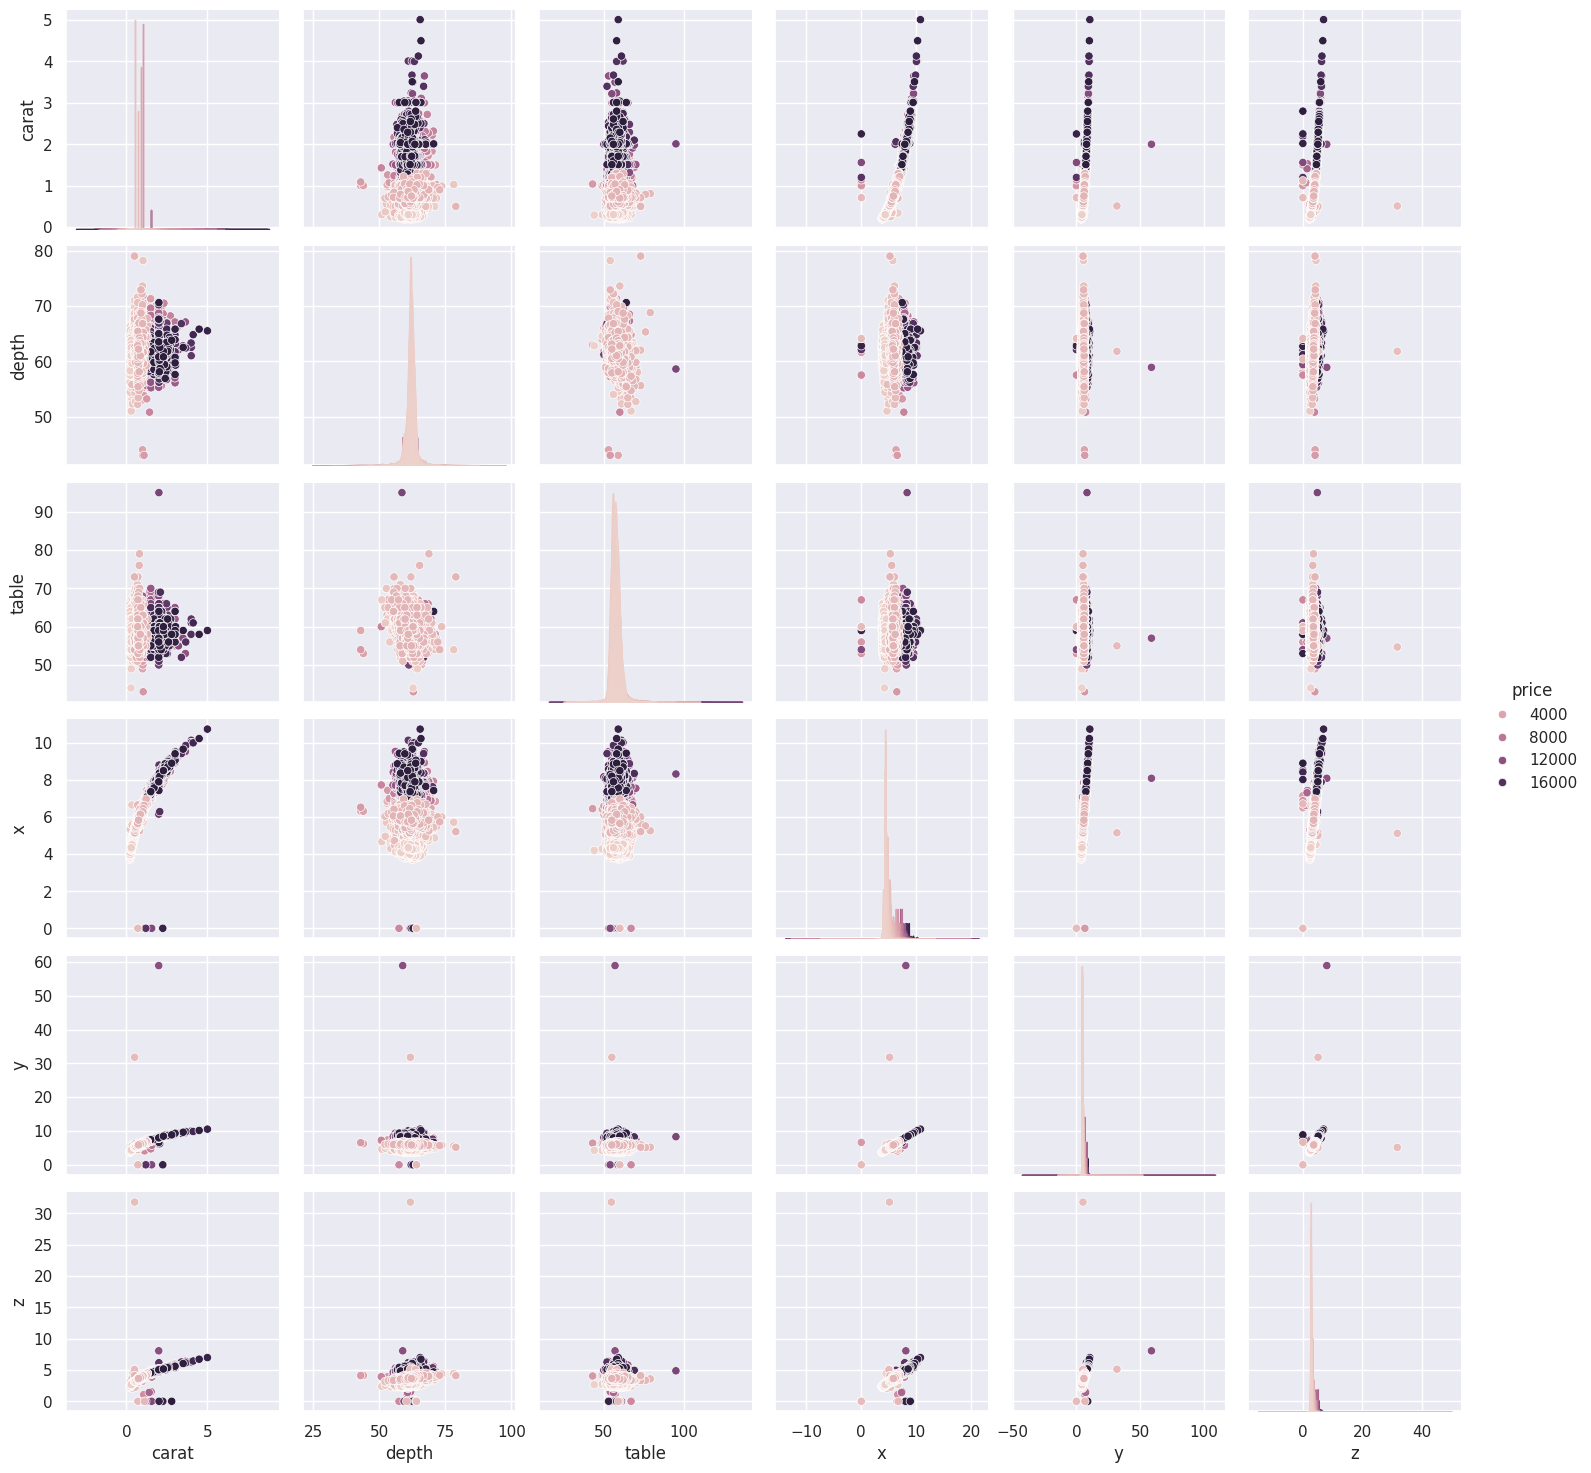

In [ ]:
sns.pairplot(diamonds, kind="scatter", hue="price")

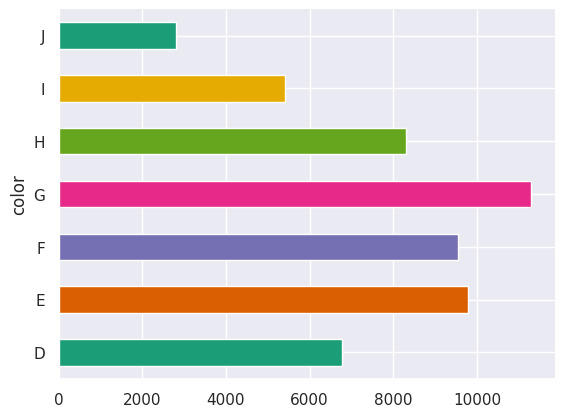

In [ ]:
diamonds.groupby('color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

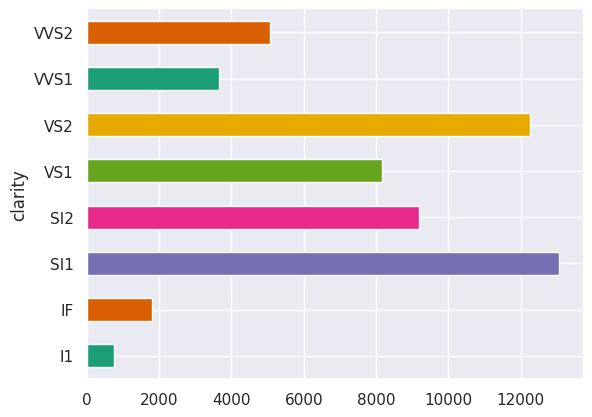

In [ ]:
diamonds.groupby('clarity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

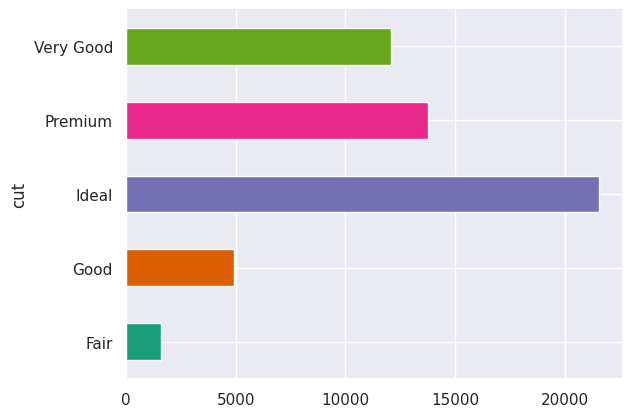

In [ ]:
diamonds.groupby('cut').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<BarContainer object of 5 artists>

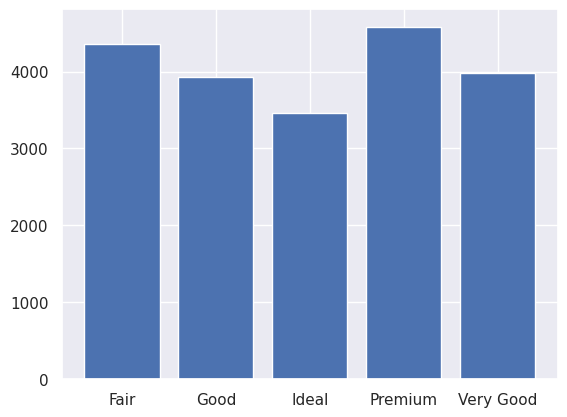

In [ ]:
grouped_diamonds = diamonds.groupby('cut')['price'].mean().reset_index()
plt.bar(grouped_diamonds['cut'], grouped_diamonds['price'], color='b')

<BarContainer object of 7 artists>

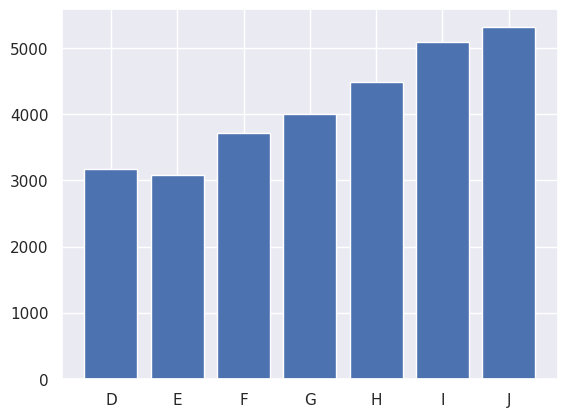

In [ ]:
grouped_diamonds = diamonds.groupby('color')['price'].mean().reset_index()
plt.bar(grouped_diamonds['color'], grouped_diamonds['price'], color='b')

<BarContainer object of 8 artists>

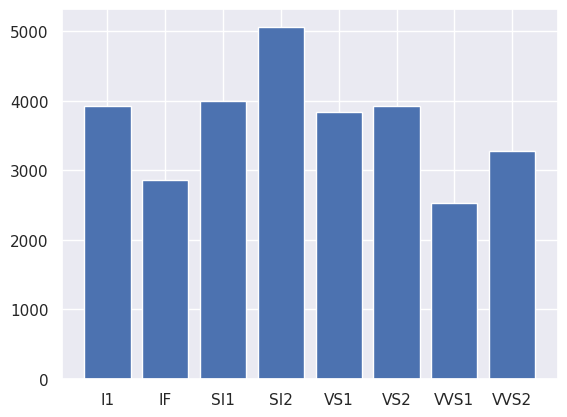

In [ ]:
grouped_diamonds = diamonds.groupby('clarity')['price'].mean().reset_index()
plt.bar(grouped_diamonds['clarity'], grouped_diamonds['price'], color='b')

<Axes: xlabel='cut', ylabel='price'>

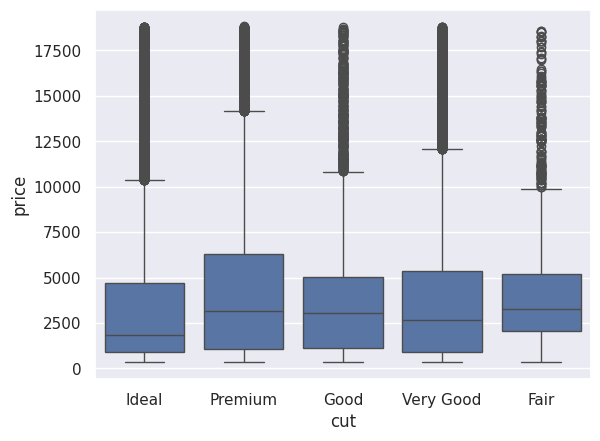

In [ ]:
sns.boxplot(data=diamonds, y='price', x='cut')

<Axes: xlabel='color', ylabel='price'>

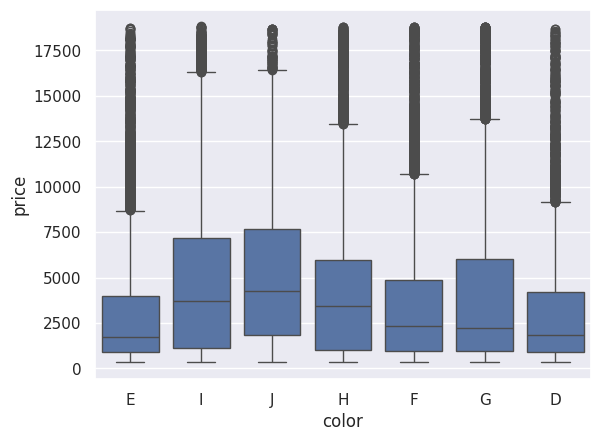

In [ ]:
sns.boxplot(data=diamonds, y='price', x='color')

<Axes: xlabel='clarity', ylabel='price'>

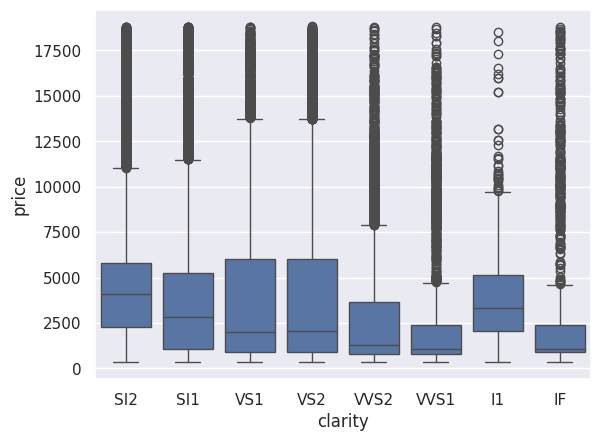

In [ ]:
sns.boxplot(data=diamonds, y='price', x='clarity')

<ipython-input-4-a9976b47263d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['price'])


<Axes: xlabel='price', ylabel='Density'>

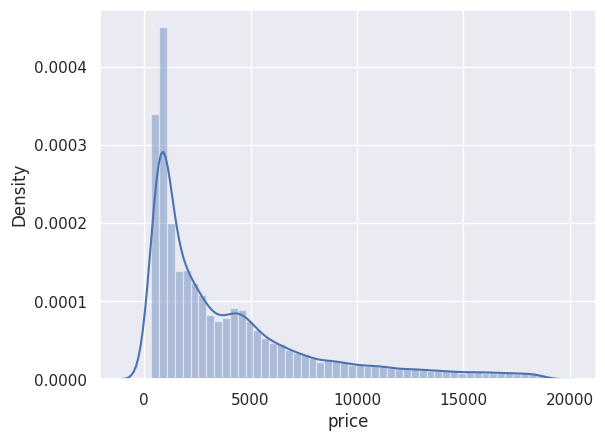

In [ ]:
sns.distplot(diamonds['price'])

<ipython-input-5-8b079c1f8359>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['carat'])


<Axes: xlabel='carat', ylabel='Density'>

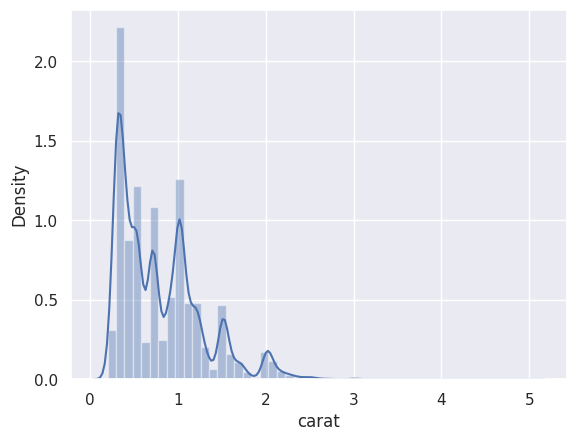

In [ ]:
sns.distplot(diamonds['carat'])

<ipython-input-6-7a057571e3c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['depth'])


<Axes: xlabel='depth', ylabel='Density'>

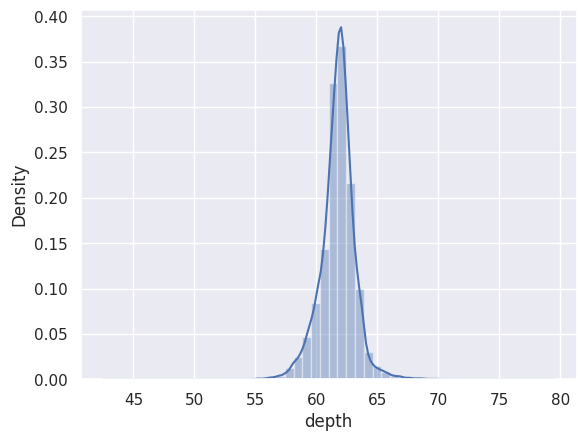

In [ ]:
sns.distplot(diamonds['depth'])

<ipython-input-7-07cd7f502007>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['table'])


<Axes: xlabel='table', ylabel='Density'>

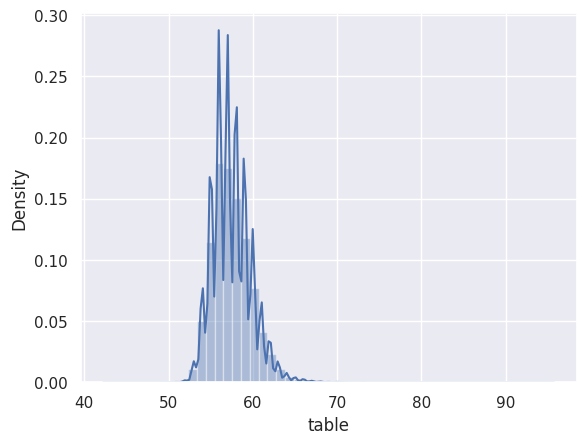

In [ ]:
sns.distplot(diamonds['table'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()
diamonds[['cut', 'color', 'clarity']] = enc.fit_transform(diamonds[['cut', 'color', 'clarity']])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds[['cut', 'color', 'clarity']] = enc.inverse_transform(diamonds[['cut', 'color', 'clarity']])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


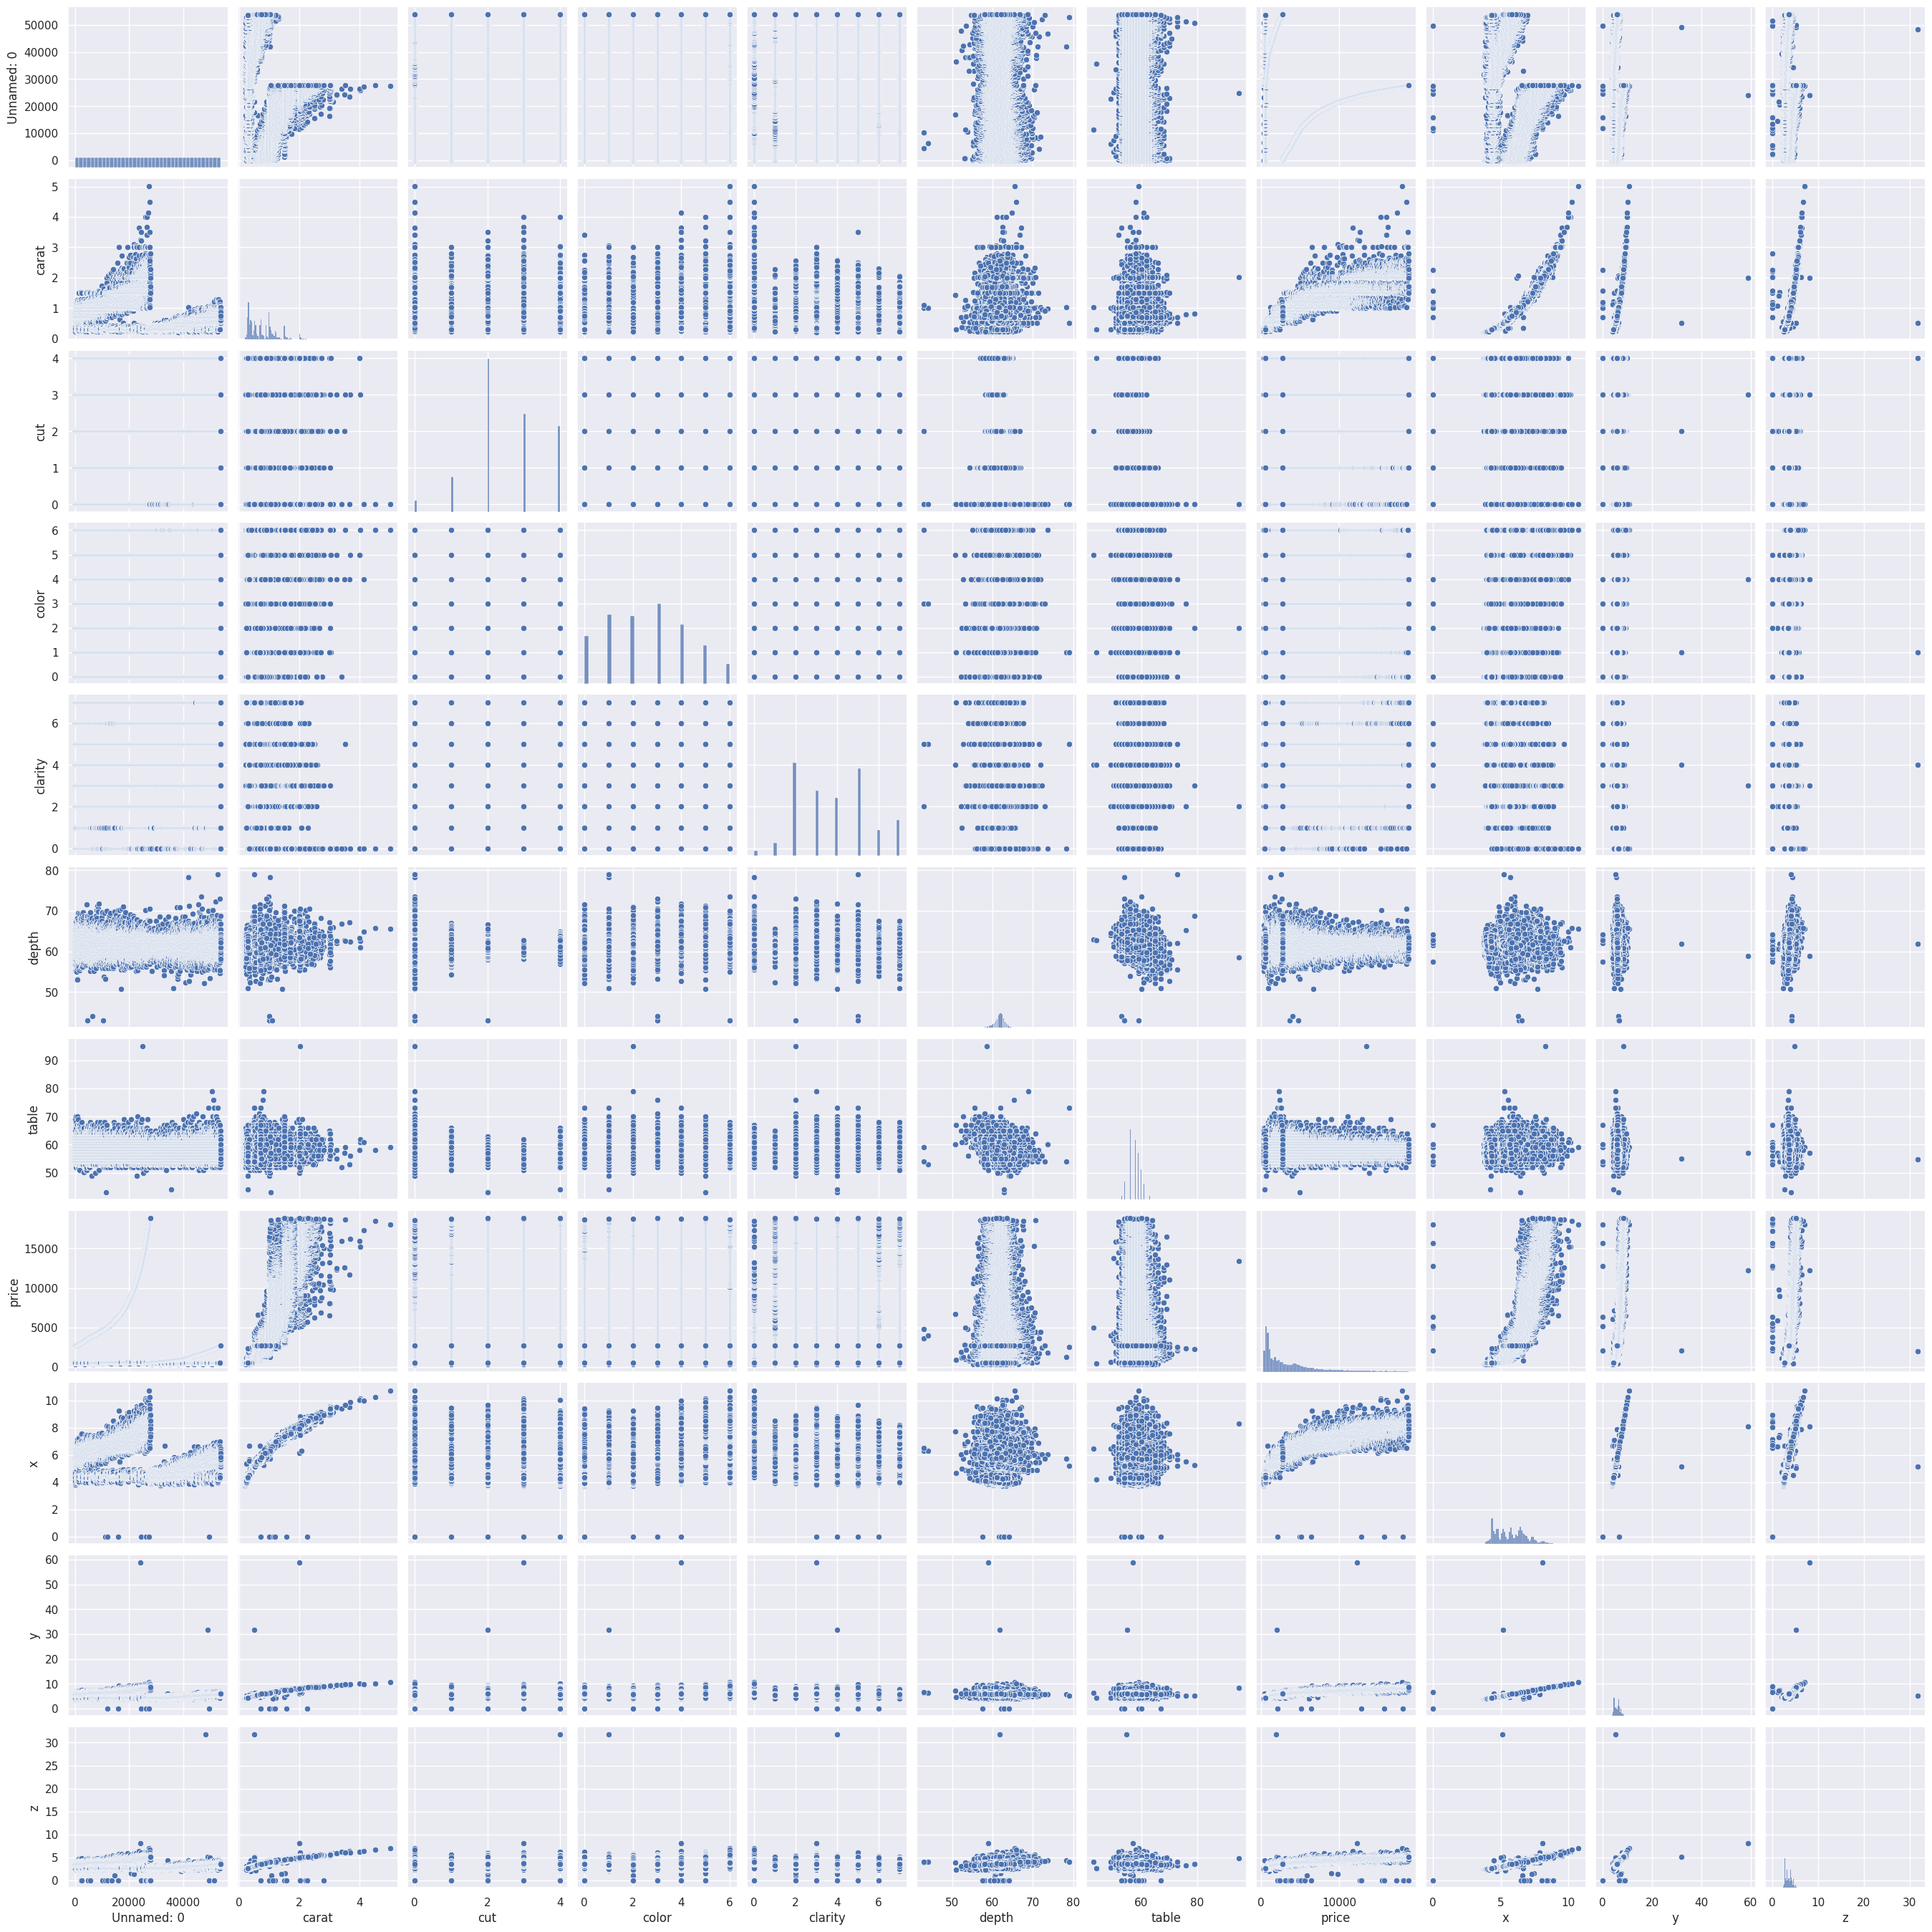

In [ ]:
sns.pairplot(diamonds)

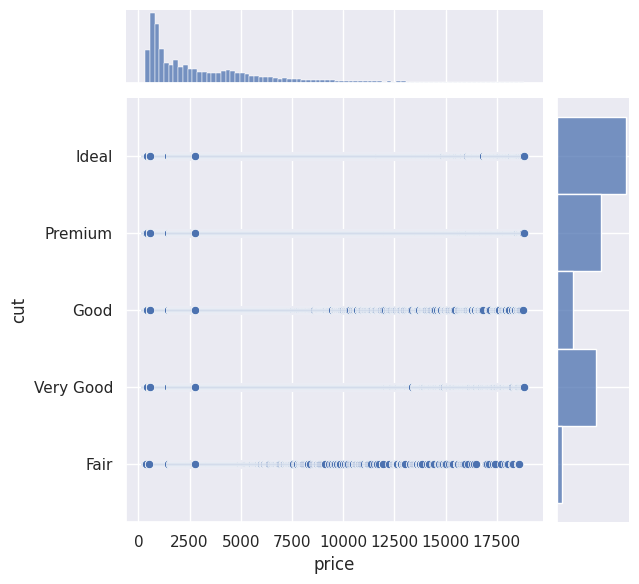

In [ ]:
sns.jointplot(x='price', y='cut', data=diamonds, kind='scatter')

<ipython-input-29-32d7ca39d33b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamonds.corr(), annot=True)


<Axes: >

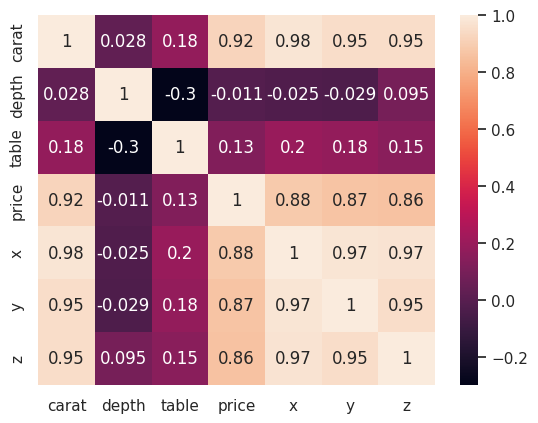

In [ ]:
sns.heatmap(diamonds.corr(), annot=True)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
diamonds[diamonds['x'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,2.0,2.0,3.0,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,4.0,4.0,5.0,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,0.0,3.0,4.0,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,2.0,3.0,5.0,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,3.0,0.0,6.0,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,3.0,4.0,3.0,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,1.0,2.0,3.0,64.1,60.0,2130,0.0,0.00,0.0


In [ ]:
diamonds[diamonds['y'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,4.0,4.0,5.0,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,0.0,3.0,4.0,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,2.0,3.0,5.0,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,3.0,0.0,6.0,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,3.0,4.0,3.0,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,1.0,2.0,3.0,64.1,60.0,2130,0.0,0.0,0.0


In [ ]:
diamonds[diamonds['z'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,3.0,3.0,3.0,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,3.0,4.0,0.0,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,3.0,3.0,3.0,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,3.0,2.0,3.0,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,1.0,3.0,0.0,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,2.0,2.0,3.0,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,4.0,4.0,5.0,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,2.0,3.0,5.0,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,0.0,3.0,4.0,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,3.0,4.0,3.0,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
diamonds = diamonds.drop(diamonds[(diamonds['x'] == 0.0) & (diamonds['y'] == 0.0)].index)
diamonds[diamonds['x'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,2.0,2.0,3.0,61.6,56.0,4954,0.0,6.62,0.0


In [ ]:
diamonds = diamonds.drop(diamonds[(diamonds['x'] == 0.0) & (diamonds['z'] == 0.0)].index)
diamonds[diamonds['x'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
diamonds = diamonds.drop(diamonds[(diamonds['y'] == 0.0) & (diamonds['z'] == 0.0)].index)
diamonds[diamonds['z'] == 0.0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,3.0,3.0,3.0,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,3.0,4.0,0.0,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,3.0,3.0,3.0,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,3.0,2.0,3.0,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,1.0,3.0,0.0,64.0,61.0,4731,7.15,7.04,0.0
13601,1.15,2.0,3.0,5.0,59.2,56.0,5564,6.88,6.83,0.0
24394,2.18,3.0,4.0,3.0,59.4,61.0,12631,8.49,8.45,0.0
26123,2.25,3.0,5.0,2.0,61.3,58.0,15397,8.52,8.42,0.0
27112,2.20,3.0,4.0,2.0,61.2,59.0,17265,8.42,8.37,0.0
27503,2.02,3.0,4.0,5.0,62.7,53.0,18207,8.02,7.95,0.0


In [ ]:
zzrows = diamonds[diamonds['z'].eq(0.0)]
diamonds.loc[zzrows.index, 'z'] = zzrows['carat'] / (zzrows['x'] * zzrows['y'] * 0.0062)

In [ ]:
price = diamonds['price'].squeeze()
diamonds = diamonds.drop(['price'], axis = 1)
D_train, D_test, p_train, p_test = train_test_split(diamonds, price, test_size=0.3, random_state=57)


In [ ]:
scaler = StandardScaler()
D_train[['carat_std', 'depth_std', 'table_std', 'x_std', 'y_std', 'z_std']] = scaler.fit_transform(D_train[['carat',
                                                                                                              'depth',
                                                                                                              'table',
                                                                                                              'x', 'y', 'z']])


D_test[['carat_std', 'depth_std', 'table_std', 'x_std', 'y_std', 'z_std']] = scaler.fit_transform(D_test[['carat',
                                                                                                              'depth',
                                                                                                              'table',
                                                                                                              'x', 'y', 'z']])


In [ ]:
D_train.drop(columns=['carat', 'depth', 'table', 'x', 'y', 'z'], inplace=True)

D_test.drop(columns=['carat', 'depth', 'table', 'x', 'y', 'z'], inplace=True)

In [ ]:
D_train.head()

,cut,color,clarity,carat_std,depth_std,table_std,x_std,y_std,z_std
34991,4.0,0.0,5.0,-0.841275,-0.107029,0.68908,-0.920735,-0.854116,-0.890862
50054,3.0,4.0,2.0,-0.119591,-0.595675,1.13646,0.072582,0.014912,-0.026465
24112,3.0,6.0,3.0,2.618565,-0.107029,0.24170,2.139755,2.100580,2.084931
27522,3.0,4.0,2.0,3.679865,0.242003,0.68908,2.775120,2.604616,2.708430
6071,3.0,2.0,2.0,0.262478,0.032584,0.68908,0.466329,0.414665,0.441160


In [ ]:

line_model = LinearRegression()
line_model.fit(D_train, p_train)

p_pred = line_model.predict(D_test)

In [ ]:
line_model.score(D_train, p_train), line_model.score(D_test, p_test)

(0.885954888810425, 0.884731960946547)

In [ ]:
r2_score(p_test, p_pred)

0.884731960946547

In [ ]:
mean_squared_error(p_test, p_pred)

1850364.859216139

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2)

D_train_poly = pf.fit_transform(D_train)
D_test_poly = pf.fit_transform(D_test)
line_model.fit(D_train_poly, p_train)

p_train_pred = line_model.predict(D_train_poly)
p_test_pred = line_model.predict(D_test_poly)

In [ ]:
line_model.score(D_train_poly, p_train), line_model.score(D_test_poly, p_test)

(0.931923633671477, 0.928086255537153)

In [ ]:
mean_squared_error(p_train, p_train_pred), mean_squared_error(p_test, p_test_pred)

(1077828.2421797726, 1154410.7693807017)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
clf = Ridge(alpha=1.0)
clf.fit(D_train, p_train)
clf.predict(D_test)


array([ 2143.413085  ,   749.26936089, 14339.28655889, ...,
        2357.60317638,  4012.72511477,  1825.93133731])

In [ ]:
clf.score(D_train, p_train), clf.score(D_test, p_test)

(0.885954830823163, 0.8847408076775918)

In [ ]:
r2_score(p_test, p_pred)

0.884731960946547

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
clf = Lasso(alpha=1.0)
clf.fit(D_train, p_train)
clf.predict(D_test)

array([ 2151.1013195 ,   745.7887005 , 14315.94543365, ...,
        2363.15874171,  4024.57764139,  1826.5377797 ])

In [ ]:
clf.score(D_train, p_train), clf.score(D_test, p_test)

(0.8859443878930908, 0.8848051827081604)

In [ ]:
r2_score(p_test, p_pred)

0.884731960946547